In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False
# when you don't have too much data you will be preprocessing for a short amount of time. 

class LeftToRight():
    # Having a class isnt necessary, but should be done!
    IMG_SIZE = (1280,720)
    LEFT = "left/"
    RIGHT = "right/"
    #LABELS = {CATS : 0, DOGS : 1}
    # We want these in one hot vectors!
    MOVIES = os.listdir("left/")
    training_data = []

    def make_training_data(self):
        LEFT = self.LEFT
        RIGHT = self.RIGHT
        #for movie in self.MOVIES:
        movie = self.MOVIES[0]
            # First build left 3 img dataset.
        for i in tqdm(range(1,500)):
            try:
                path_l = os.path.join(LEFT+movie, os.listdir(LEFT+movie)[i])
                img_l = cv2.imread(path_l)
                path_r = os.path.join(RIGHT+movie, os.listdir(RIGHT+movie)[i])
                img_r = cv2.imread(path_r)
                self.training_data.append([np.array(img_l),np.array(img_r)])
            except Exception as e:
                prtint(str(e))
                pass

        #np.random.shuffle(self.training_data)
        #DO NOT SHUFFLE: otherwise frame order is lost.
        np.save("training_data.npy", self.training_data)
if REBUILD_DATA:
    lefttoright = LeftToRight()
    lefttoright.make_training_data()

In [4]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

499


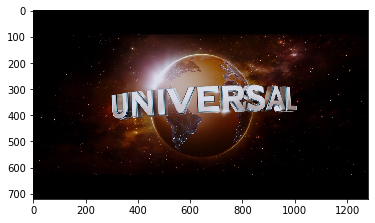

In [11]:
import matplotlib.pyplot as plt
plt.imshow(training_data[-1][0])#,cmap="rgb") # Second index omits the 1-h-v
plt.show()